In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
cwd = os.getcwd()
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))

SAVEPLOTS = False

SAVEDIR = "../plots/mf-hubbard"
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

# Define the hopping geometries

In [2]:
def oneDimensionalChain(N):
    HoppingMatrix = np.zeros( ( N , N ) )
    ##  Set the elements of the hopping matrix that define PBC corresponding to the ends of the 1D chain
    HoppingMatrix[0, 1] += 1.;
    HoppingMatrix[0, N - 1] += 1.;
    HoppingMatrix[N - 1, 0] += 1.;
    HoppingMatrix[N - 1, N - 2] += 1.;
    ##  Set the remaining ones
    for i in range(1, N - 1):
        HoppingMatrix[i, i - 1] += 1; HoppingMatrix[i, i + 1] += 1;
    return HoppingMatrix

def iRibbon(x, y, z, Nx, Ny):
    return Nx * Ny * z + Nx * y + x

def nanoribbon(N, Ny):
    Nx = int(N / Ny / 2)
    K = np.zeros((2 * Nx * Ny, 2 * Nx * Ny))
    for x in range(Nx):
        for y in range(Ny):
            if y == (Ny - 1) :
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
            else:
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
    for x in range(Nx):
        for y in range(Ny):
            if y == 0 :
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
            else:
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1

    return K

# Mean field for a 1D Hubbard Chain. Uniform electron density ansatz

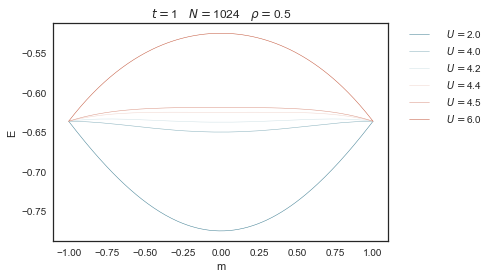

In [3]:
Us = np.array([2., 4., 4.2, 4.4, 4.5, 6.])

fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'm')
plt.ylabel(r'E')

N = 1024
filling = 2 # 2 : quarter filling
Np = int(N / filling)
t = 1

K = oneDimensionalChain(N)

#K = nanoribbon(N, 8)

for idx, U in enumerate(Us):
    
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N

    eUp = - 2 * t * np.cos(k)
    eDown = eUp
    
    #eUp = la.eigvals(K)
    #eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 0.5)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r'$t=$' + r'' + str(t) + r'$\quadN=$' \
              + r'' + str(N) + r'$\quad\rho=$' + r'' + str(1/filling))

if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + "/mf-hubbard-1d-quarter-filling" + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

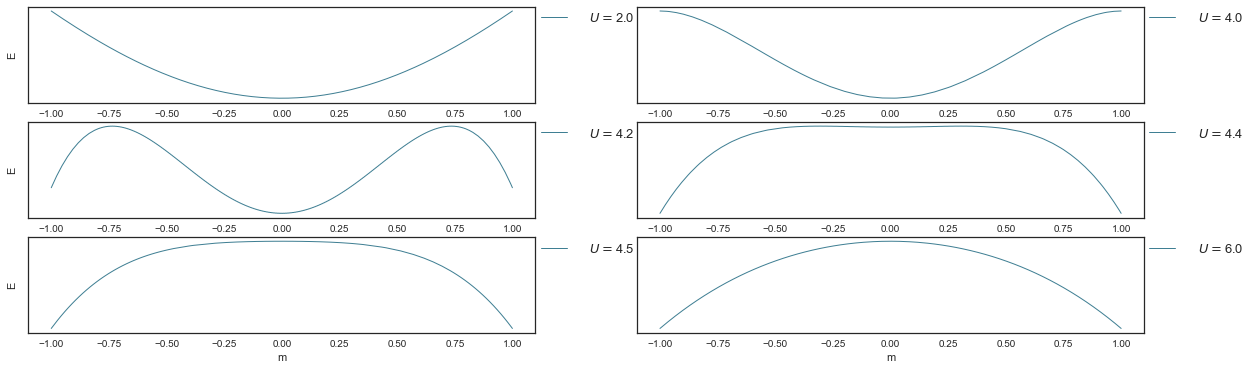

In [4]:
f = plt.figure(figsize=(20,6))
nCols = 2

for idx, U in enumerate(Us):
    N = 1024
    filling = 2 # 2 : quarter filling
    Np = int(N / filling)
    t = 1
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    #k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N
    
    eUp = - 2 * t * np.cos(k)
    eDown = eUp
    
    #eUp = la.eigvals(K)
    #eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    ax = f.add_subplot(Us.size/nCols, nCols, idx + 1)
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 13})
    if (idx + 1) > nCols:
        ax.set_xlabel(r'm')
    if (idx + nCols) % nCols == 0:
        ax.set_ylabel(r'E')
    ax.set_yticklabels([])
    
if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + "/mf-hubbard-1d-quarter-filling-multiple" + '.png', dpi = 400, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Non-uniform electron density ansatz

## Define the fermi function for both zero and finite temperature

In [5]:
def fermi(e, mu, beta):
    '''
    For zero temperature, set beta = 99999
    '''
    if beta == 99999:
        return (e < mu).astype(int)
    else:
        return 1 / ( 1 + np.exp( beta * ( e - mu ) ) )

## Plot function

In [6]:
SAVESUBDIR = "/nanoribbon-half-filling"
if not os.path.exists(SAVEDIR + SAVESUBDIR):
    os.makedirs(SAVEDIR + SAVESUBDIR)

def plot(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit):
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left \langle n_{i,\sigma} \right\rangle$')

    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(flatui)
    ax.plot(np.arange(N) + 1, nUp, color = "#e74c3c"\
            , label = r'$\left \langle n_{i,\uparrow} \right\rangle$',\
           linewidth = 1)
    ax.plot(np.arange(N) + 1, nDown, color = "#95a5a6"\
            , label = r'$\left \langle n_{i,\downarrow} \right\rangle$',\
           linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1),\
                    loc=2, borderaxespad=0.)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/densities" + '.png',\
                    dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.figure(1)
    plt.plot(nUp - nDown, color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left\langle m_{i} \right\rangle$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/magnetization" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(2)
    plt.plot(abs(nUp - nDown), color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$| \left\langle m_{i} \right\rangle |$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/AbsMagnetization" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(3)
    plt.plot(np.arange(energies[itSwitch:].size) + itSwitch, energies[itSwitch:], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFafterAnnealing" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(4)
    plt.plot(np.arange(energies.size) , energies, color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFtotal" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(5)
    plt.plot(np.arange(energies[itMax-lastNit:].size) + (itMax - lastNit)\
             , energies[itMax-lastNit:], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFlastNit" + '.png', dpi = 600, bbox_inches='tight')


    a1 = np.arange(Nx)
    a2 = np.arange(Ny)
    vs = np.zeros((2 * Nx * Ny , 2))
    lat = np.zeros((2 * Nx * Ny))
    clr = np.chararray((2 * Nx * Ny), itemsize = 10)
    v1 = np.array([1, 0])
    v2 = np.array([1 / 2, np.sqrt(3) / 2])
    for i in range(Nx):
        for j in range(Ny):
            for k in range(2):
                vs[Nx * Ny * k + Nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 + k *\
                np.array([1 / 2,- 1 / ( 2 * np.sqrt(3) )])
                lat[Nx * Ny * k + Nx * j + i]\
                =  400 * (nUp[Nx * Ny * k + Nx * j + i]\
                          - nDown[Nx * Ny * k + Nx * j + i] )
                if k == 0 :
                    clr[Nx * j + i] = "#e74c3c"
                if k == 1 :
                    clr[Nx * Ny + Nx * j + i] = "#95a5a6"

    fig = plt.figure(6)
    ax = fig.add_subplot(111)
    ax.scatter(vs[:, 0], vs[:, 1], s = abs(lat),\
               c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
    ax.axis('equal')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/MFnanoribbon.png", dpi = 400)

## Reproduce results for a nanoribbon

In [31]:
N = 256 # number of sites
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 50 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 1.2 # on-site interaction
muPHS = 0 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / itMax
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
Ny = 8
Nx = int(N / 2 / Ny)
K = nanoribbon(N, Ny)

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

nUp = np.array([1 , 0])
for i in range(int(N/2) - 1):
    nUp = np.concatenate((nUp, np.array([1, 0]) ))

nDown = np.array([0, 1])
for i in range(int(N/2) - 1):
    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# Initialize energies
energies = np.zeros(itMax)

while (it < itMax): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 / N )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 / N )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    # To check convergence
    print('delta nUp: ', np.dot(nUp - nUpOld, nUp - nUpOld) / N**2)
    print('delta nDown: ', np.dot(nDown - nDownOld, nDown - nDownOld) / N**2)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    energies[it] = U / N * np.dot(nUp, nDown) + mu * (nUp + nDown).sum()\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1

beta:  1.0
delta nUp:  0.00048828125
delta nDown:  0.00048828125
<n>:  0.5
beta:  1.1
delta nUp:  0.000124078071526
delta nDown:  0.000124106985254
<n>:  0.797991857222
beta:  1.2100000000000002
delta nUp:  2.82549132099e-05
delta nDown:  2.82621190998e-05
<n>:  0.919902423193
beta:  1.3310000000000004
delta nUp:  7.45012273247e-06
delta nDown:  7.45181149719e-06
<n>:  0.968787429862
beta:  1.4641000000000004
delta nUp:  2.27713510984e-06
delta nDown:  2.27752128925e-06
<n>:  0.98806039663
beta:  1.6105100000000006
delta nUp:  7.72407055107e-07
delta nDown:  7.72493335388e-07
<n>:  0.995548944573
beta:  1.7715610000000008
delta nUp:  2.76926673437e-07
delta nDown:  2.76945522237e-07
<n>:  0.998422204947
beta:  1.9487171000000012
delta nUp:  1.01562339208e-07
delta nDown:  1.01566367872e-07
<n>:  0.99951191764
beta:  2.1435888100000016
delta nUp:  3.74236526142e-08
delta nDown:  3.74244954596e-08
<n>:  0.999919683214
beta:  2.357947691000002
delta nUp:  1.37215784678e-08
delta nDown:  1

delta nUp:  5.21983337275e-19
delta nDown:  4.40459128009e-18
<n>:  1.00000725196
beta:  50
delta nUp:  1.15880834472e-18
delta nDown:  1.75414054382e-18
<n>:  1.00000725196
beta:  50
delta nUp:  1.12659384462e-18
delta nDown:  1.46963122468e-19
<n>:  1.00000725196
beta:  50
delta nUp:  2.36637857661e-18
delta nDown:  1.05114857915e-19
<n>:  1.00000725196
beta:  50
delta nUp:  3.40394779933e-18
delta nDown:  2.08487827061e-19
<n>:  1.00000725196
beta:  50
delta nUp:  2.4794640376e-18
delta nDown:  4.17696573279e-19
<n>:  1.00000725196
beta:  50
delta nUp:  2.80176176876e-19
delta nDown:  8.88015229352e-19
<n>:  1.00000725196
beta:  50
delta nUp:  5.78705297065e-19
delta nDown:  7.92177753823e-19
<n>:  1.00000725196
beta:  50
delta nUp:  6.67156227496e-19
delta nDown:  2.79625151129e-19
<n>:  1.00000725196
beta:  50
delta nUp:  5.48417699441e-19
delta nDown:  5.41504936218e-19
<n>:  1.00000725196
beta:  50
delta nUp:  4.3547542696e-19
delta nDown:  7.74912511439e-19
<n>:  1.00000725196


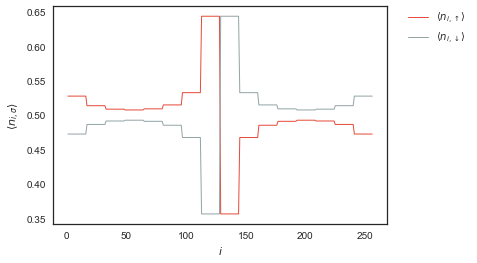

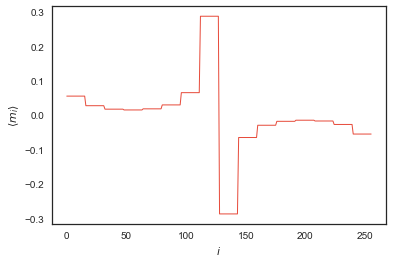

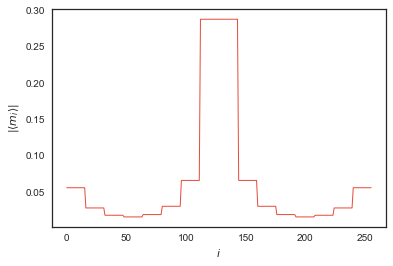

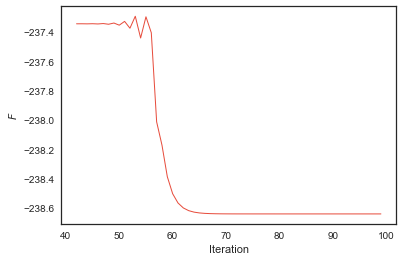

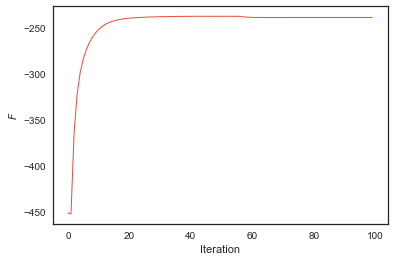

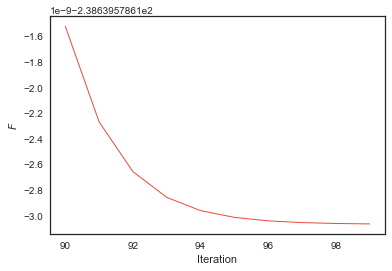

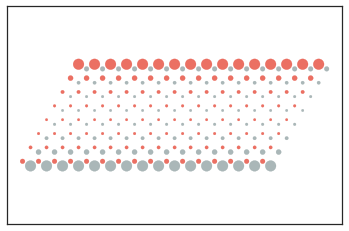

In [32]:
lastNit = 10
plot(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit)

In [7]:
def iTriang(x, y, Nx, Ny):
    return Nx * y + x

def triangular(Nx, Ny, nOrb, hoppings):
    T = np.zeros((nOrb*Nx*Ny, nOrb*Nx*Ny))
    for x in range(Nx):
        for y in range(Ny):
            # Diagonal term
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb,\
              iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb ]\
            = hoppings[0]
            
            # E1
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1)*nOrb,\
              iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb ]\
            = hoppings[1]
            
            # E4
            T[ iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb\
              , iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb ] = hoppings[4]
            
            if y == 0:
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 1, Nx, Ny)*nOrb:(iTriang( x, 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[6]
                
                T[ iTriang(x, 1, Nx, Ny)*nOrb:(iTriang(x, 1, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb ]\
                = hoppings[3]
                
                # Periodic
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( x, Ny - 1, Nx, Ny)*nOrb:(iTriang( x, Ny - 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[3]
                T[ iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb ]\
                = hoppings[6]
                
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)*nOrb:(iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[2]
                T[iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)*nOrb:(iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)+1)*nOrb,\
                iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                = hoppings[5]
                
                #
                if x == 0:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny) + 1)*nOrb,\
                      iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny) + 1)*nOrb]\
                    = hoppings[5]
                    T[iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                else:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                      iTriang( x - 1, 1, Nx, Ny)*nOrb:(iTriang( x - 1, 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x - 1, 1, Nx, Ny)*nOrb:(iTriang(x - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
            else:
                if y == Ny - 1:
                    T[iTriang(x, Ny - 1 , Nx, Ny)*nOrb:(iTriang(x, Ny - 1 , Nx, Ny) + 1)*nOrb,\
                      iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny) + 1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)+1)*\
                      nOrb, iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 2, Nx, Ny)*nOrb:(iTriang( x, Ny - 2, Nx, Ny)+1)*nOrb]\
                    = hoppings[3]
                    T[iTriang(x, Ny - 2, Nx, Ny)*nOrb:(iTriang(x, Ny - 2, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 1, Nx, Ny)*nOrb:(iTriang( x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[6]
                    # Periodic 
                    T[iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[6]
                    T[iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb,\
                      iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[3]
                    if x == 0:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang( Nx - 1, 0, Nx, Ny)*nOrb:(iTriang( Nx - 1, 0, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang( Nx - 1, 0, Nx, Ny)*nOrb:(iTriang( Nx - 1, 0, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    else:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang(x - 1, 0, Nx, Ny)*nOrb:(iTriang(x - 1, 0, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang(x - 1, 0, Nx, Ny)*nOrb:(iTriang(x - 1, 0, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    #
                else:
                    T[iTriang(x, y , Nx, Ny)*nOrb:(iTriang(x, y , Nx, Ny)+1)*nOrb,\
                      iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y - 1, Nx, Ny)*nOrb:(iTriang( x, y - 1, Nx, Ny)+1)*nOrb] = hoppings[3]
                    T[iTriang(x, y - 1, Nx, Ny)*nOrb:(iTriang(x, y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y, Nx, Ny)*nOrb:(iTriang( x, y, Nx, Ny)+1)*nOrb] = hoppings[6]
                    if x == 0:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    else:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
    return T



def triangularNano(Nx, Ny, nOrb, hoppings):
    T = np.zeros((nOrb*Nx*Ny, nOrb*Nx*Ny))
    for x in range(Nx):
        for y in range(Ny):
            # Diagonal term
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb,\
              iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb ]\
            = hoppings[0]
            
            # E1
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1)*nOrb,\
              iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb ]\
            = hoppings[1]
            
            # E4
            T[ iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb\
              , iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb ] = hoppings[4]
            
            if y == 0:
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 1, Nx, Ny)*nOrb:(iTriang( x, 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[6]
                
                T[ iTriang(x, 1, Nx, Ny)*nOrb:(iTriang(x, 1, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb ]\
                = hoppings[3]
            
                if x == 0:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny) + 1)*nOrb,\
                      iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny) + 1)*nOrb]\
                    = hoppings[5]
                    T[iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                else:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                      iTriang( x - 1, 1, Nx, Ny)*nOrb:(iTriang( x - 1, 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x - 1, 1, Nx, Ny)*nOrb:(iTriang(x - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
            else:
                if y == Ny - 1:
                    T[iTriang(x, Ny - 1 , Nx, Ny)*nOrb:(iTriang(x, Ny - 1 , Nx, Ny) + 1)*nOrb,\
                      iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny) + 1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)+1)*\
                      nOrb, iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 2, Nx, Ny)*nOrb:(iTriang( x, Ny - 2, Nx, Ny)+1)*nOrb]\
                    = hoppings[3]
                    T[iTriang(x, Ny - 2, Nx, Ny)*nOrb:(iTriang(x, Ny - 2, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 1, Nx, Ny)*nOrb:(iTriang( x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[6]
                    
                else:
                    T[iTriang(x, y , Nx, Ny)*nOrb:(iTriang(x, y , Nx, Ny)+1)*nOrb,\
                      iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y - 1, Nx, Ny)*nOrb:(iTriang( x, y - 1, Nx, Ny)+1)*nOrb] = hoppings[3]
                    T[iTriang(x, y - 1, Nx, Ny)*nOrb:(iTriang(x, y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y, Nx, Ny)*nOrb:(iTriang( x, y, Nx, Ny)+1)*nOrb] = hoppings[6]
                    if x == 0:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    else:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
    return T

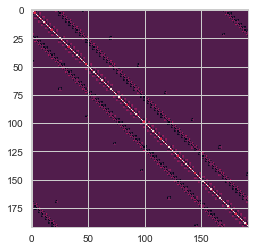

In [14]:
nOrb = 3
Nx = 8
Ny = 8

abs_t0 = 0.188

e1 = 0.919 / abs_t0
e2 = 2.065 / abs_t0
t0 = - 1
t1 = 0.317 / abs_t0
t2 = 0.456 / abs_t0
t11 = 0.211 / abs_t0
t12 = 0.29 / abs_t0
t22 = 0.13 / abs_t0

E0 = np.array([[e1, 0, 0],
               [0, e2, 0],
               [0, 0, e2]])

E1 = np.array([[t0, t1, t2],
               [-t1, t11, t12],
               [t2, -t12, t22]])

E4 = np.array([[t0, -t1, t2],
               [t1, t11, -t12],
               [t2, t12, t22]])

E2 = np.array([[t0, 0.5 * t1 - np.sqrt(3) / 2 * t2, - np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [-0.5 * t1 - np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), np.sqrt(3) / 4 * ( t22 - t11 ) - t12],
               [np.sqrt(3) / 2 * t1 - 0.5 * t2, np.sqrt(3) / 4 * ( t22 - t11 ) + t12, ( 3 * t11 + t22) / 4 ]])

E5 = np.array([[t0, - 0.5 * t1 - np.sqrt(3) / 2 * t2, np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [0.5 * t1 - np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), np.sqrt(3) / 4 * ( t22 - t11 ) + t12],
               [-np.sqrt(3) / 2 * t1 - 0.5 * t2, np.sqrt(3) / 4 * ( t22 - t11 ) - t12, ( 3 * t11 + t22) / 4 ]])

E3 = np.array([[t0, - 0.5 * t1 + np.sqrt(3) / 2 * t2, -np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [0.5 * t1 + np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), -np.sqrt(3) / 4 * ( t22 - t11 ) + t12],
               [np.sqrt(3) / 2 * t1 - 0.5 * t2, -np.sqrt(3) / 4 * ( t22 - t11 ) - t12, ( 3 * t11 + t22) / 4 ]])

E6 = np.array([[t0, 0.5 * t1 + np.sqrt(3) / 2 * t2, np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [-0.5 * t1 + np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), -np.sqrt(3) / 4 * ( t22 - t11 ) - t12],
               [-np.sqrt(3) / 2 * t1 - 0.5 * t2, -np.sqrt(3) / 4 * ( t22 - t11 ) + t12, ( 3 * t11 + t22) / 4 ]])

hoppings = np.array([E0, E1, E2, E3, E4, E5, E6])
orbitalHoppingsPBC = triangular(Nx, Ny, nOrb, hoppings)
plt.imshow(orbitalHoppingsPBC, interpolation='nearest')

In [9]:
orbitalHoppingsPBC

array([[  5.68478261,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  11.43478261,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  11.43478261, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   5.68478261,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         11.43478261,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  11.43478261]])

## Plot function TMD

In [10]:
def plotTMD(nUp, nDown, energies, itSwitch, Nx, Ny, lastNit, lastIt, dotscale):
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left \langle n_{i,\sigma} \right\rangle$')

    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(flatui)

    nUpSite = np.zeros(Nx * Ny)
    nDownSite = np.zeros(Nx * Ny)
    for i in range(Nx * Ny):    
        nUpSite[i] = nUp[nOrb * i] + nUp[nOrb * i + 1] + nUp[nOrb * i + 2]
        nDownSite[i] = nDown[nOrb * i] + nDown[nOrb * i + 1] + nDown[nOrb * i + 2]

    ax.plot(np.arange(Nx * Ny), nUpSite, color = "#e74c3c"\
            , label = r'$\left \langle n_{i,\uparrow} \right\rangle$',\
           linewidth = 1)
    ax.plot(np.arange(Nx * Ny), nDownSite, color = "#95a5a6"\
            , label = r'$\left \langle n_{i,\downarrow} \right\rangle$',\
           linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1),\
                    loc=2, borderaxespad=0.)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/densitiesTMD" + '.png',\
                    dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.figure(1)
    plt.plot(nUpSite - nDownSite, color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left\langle m_{i} \right\rangle$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/magnetizationTMD" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(2)
    plt.plot(abs(nUpSite - nDownSite), color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$| \left\langle m_{i} \right\rangle |$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/AbsMagnetizationTMD" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(3)
    plt.plot(np.arange(energies[itSwitch:lastIt].size) + itSwitch, energies[itSwitch:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFafterAnnealingTMD" + '.png', dpi = 600, bbox_inches='tight')


    plt.figure(4)
    plt.plot(np.arange(energies[:lastIt].size) , energies[:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFtotalTMD" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(5)
    plt.plot(np.arange(energies[lastIt-lastNit:lastIt].size) + (lastIt - lastNit)\
             , energies[lastIt-lastNit:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFlastNitTMD" + '.png', dpi = 600, bbox_inches='tight')
        
    clr = np.chararray((Nx * Ny), itemsize = 10)
        
    a1 = np.arange(Nx)
    a2 = np.arange(Ny)
    vs = np.zeros((Nx * Ny , 2))
    lat = np.zeros((Nx * Ny))
    v1 = np.array([1, 0])
    v2 = np.array([1 / 2, np.sqrt(3) / 2])
    for i in range(Nx):
        for j in range(Ny):
                vs[Nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 
                lat[Nx * j + i]\
                =  dotscale * (nUpSite[Nx * j + i]\
                          - nDownSite[Nx * j + i] )
                if (nUpSite[Nx * j + i]\
                          - nDownSite[Nx * j + i] ) < 0 :
                    clr[Nx * j + i] = "#95a5a6"
                else:
                    clr[Nx * j + i] = "#e74c3c"

    fig = plt.figure(6)
    ax = fig.add_subplot(111)
    ax.scatter(vs[:, 0], vs[:, 1], s = abs(lat),\
               c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
    ax.axis('equal')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/MFnanoribbonTMD.png", dpi = 600)
        
    fig = plt.figure(7)
    ax = fig.add_subplot(111)
    spins = nUpSite - nDownSite
    spinProf = np.zeros(Ny)
    for i in range(Nx * Ny):
        if (i+1) % Nx:
            spinProf[int((i+1) /  Nx)] = spins[i]
    ax.plot(np.arange(Ny), spinProf, c = "#e74c3c", linewidth = 0.5, marker = 'o', markersize = 3)
    plt.xlabel('y')
    plt.ylabel(r'$\left\langle m_y \right\rangle$')
    axins = inset_axes(ax, width=3, height=1.2, loc=2)
    axins.tick_params(labelleft = False)
    axins.set_xlabel(r'$i$')
    axins.set_ylabel(r'$\left\langle m_i \right\rangle$')
    axins.yaxis.set_label_position("right")
    axins.plot(spins,c = "#95a5a6", linewidth = 1)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR +"/magProf.png", dpi = 500, bbox_inches='tight')
    
    fig = plt.figure(8)
    ax = fig.add_subplot(111)
    ax.plot(np.arange(energies[itSwitch:lastIt].size) + itSwitch,\
             energies[itSwitch:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    plt.xlim(40, lastIt+25)
    axins1 = inset_axes(ax, width=1.5, height=1., loc=1)
    axins2 = inset_axes(ax, width=1.5, height=1., loc=4)
    axins1.set_xlabel('Iteration')
    axins1.set_ylabel(r'$\Omega$')
    axins1.plot(np.arange(energies[:lastIt].size),\
               energies[:lastIt], color = "#e74c3c", linewidth = 1)
    axins2.plot(np.arange(energies[lastIt-lastNit:lastIt].size) + (lastIt - lastNit)\
         , energies[lastIt-lastNit:lastIt], color = "#e74c3c", linewidth = 1)
    axins2.tick_params(labelbottom=False)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR +"/grandPotMin.png", dpi = 500, bbox_inches='tight')
      

In [278]:
N = nOrb * Nx * Ny # number of sites
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 50 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 8 # on-site interaction
muPHS = -12.7 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / itMax
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = orbitalHoppingsPBC

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

nUp = np.ones(N)

nDown = np.zeros(N)

# Initialize energies
energies = np.zeros(itMax)

while (it < itMax): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 / N )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 / N )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        #nUp = ( 1 / 2 + lbda * it ) * nUp\
        #+ ( 1 / 2 - lbda * it) * nUpOld
        #nDown = ( 1 / 2 + lbda * it ) * nDown\
        #+ ( 1 / 2 - lbda * it) * nDownOld
        nUp = 0.5 * nUp\
        + 0.5 * nUpOld
        nDown = 0.5 * nDown\
        + 0.5 * nDownOld

    # To check convergence
    print('delta nUp: ', np.dot(nUp - nUpOld, nUp - nUpOld) / N**2)
    print('delta nDown: ', np.dot(nDown - nDownOld, nDown - nDownOld) / N**2)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    energies[it] = U / N * np.dot(nUp, nDown) + mu * (nUp + nDown).sum()\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1

beta:  1.0


ValueError: operands could not be broadcast together with shapes (240,240) (36,36) 

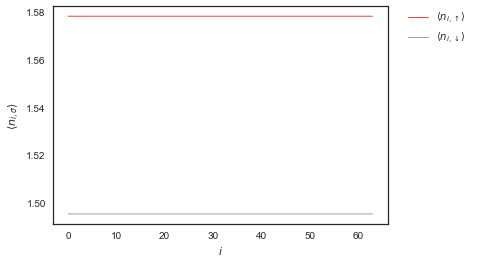

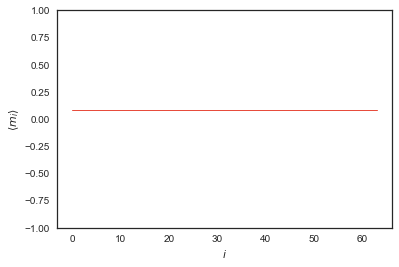

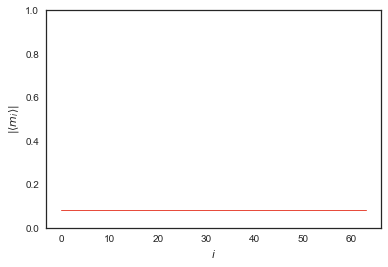

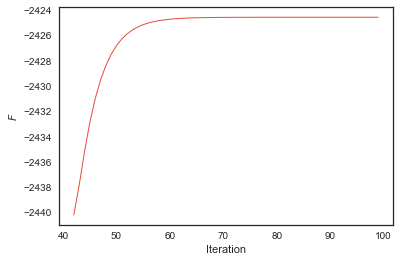

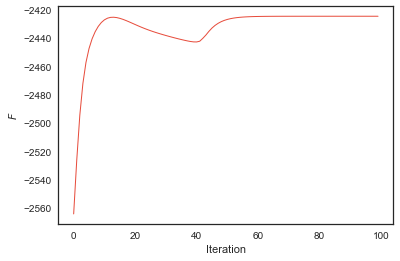

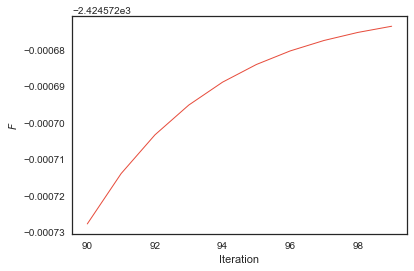

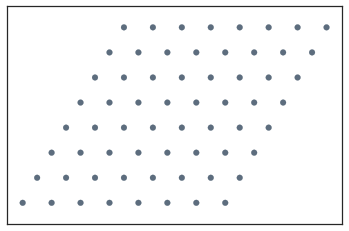

In [140]:
lastNit = 10
plotTMD(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit, lastIt)

In [65]:
Nx = 32
Ny = 8

orbitalHoppingsNano = triangularNano(Nx, Ny, nOrb, hoppings)

N = nOrb * Nx * Ny # number of sites
beta0 = 1.07 # must be > 1, otherwise beta decreases
betaTarget = 20 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 8 # on-site interaction
muPHS = 12.7 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 80
it = 0
lbda = 0.5 / (1.2 * itMax) # the factor multiplied by itMax impedes P ( I ) < \delta
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = - orbitalHoppingsNano

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

nUp = np.ones(N) - 0.01 * np.random.rand(N)

nDown = np.zeros(N) + 0.01 * np.random.rand(N)

# Hybrid initial condition

#nUp = np.zeros(N)
#nDown = np.zeros(N)

#spinFlipper = 0.5

#for i in range(N):
#    if (i+1) % (3 * Nx) == 0:
#        spinFlipper *= -1
#    nUp[i] = 0.5 + spinFlipper
#    nDown[i] = 0.5 - spinFlipper

# Initialize energies
energies = np.zeros(itMax)

# Tolerance

delta = 1e-12

deltaUp = delta + 1
deltaDown = delta + 1

while (it < itMax and \
      deltaUp > delta and\
      deltaDown > delta): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 / N )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 / N )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    deltaUp = np.dot(nUp - nUpOld, nUp - nUpOld) / N**2  
    deltaDown = np.dot(nDown - nDownOld, nDown - nDownOld) / N**2
    
    # To check convergence
    print('delta nUp: ', deltaUp)
    print('delta nDown: ', deltaDown)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    energies[it] = U * np.dot(nUp, nDown) / N + mu * (nUp + nDown).sum() / N\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1
    
lastIt = it

beta:  1.0
delta nUp:  2.01614153617e-05
delta nDown:  5.02739852702e-05
<n>:  1.05880571592
beta:  1.07
delta nUp:  1.5232605643e-05
delta nDown:  1.40468201549e-05
<n>:  1.04873545715
beta:  1.1449
delta nUp:  7.74175442594e-06
delta nDown:  4.72898051802e-06
<n>:  1.03005110207
beta:  1.225043
delta nUp:  3.56952634147e-06
delta nDown:  2.00692665651e-06
<n>:  1.0167905347
beta:  1.3107960100000002
delta nUp:  1.68458858962e-06
delta nDown:  1.00723686574e-06
<n>:  1.00899368166
beta:  1.4025517307000004
delta nUp:  8.56627597793e-07
delta nDown:  5.55283824023e-07
<n>:  1.00448175553
beta:  1.5007303518490005
delta nUp:  4.73304342347e-07
delta nDown:  3.25931485874e-07
<n>:  1.00176018223
beta:  1.6057814764784306
delta nUp:  2.80656855551e-07
delta nDown:  2.01619939552e-07
<n>:  1.00005299889
beta:  1.718186179831921
delta nUp:  1.75436499409e-07
delta nDown:  1.30270518958e-07
<n>:  0.998966950339
beta:  1.8384592124201555
delta nUp:  1.13672328935e-07
delta nDown:  8.692786268

Final energy:  -7598.6186


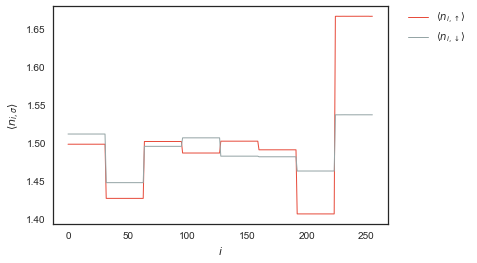

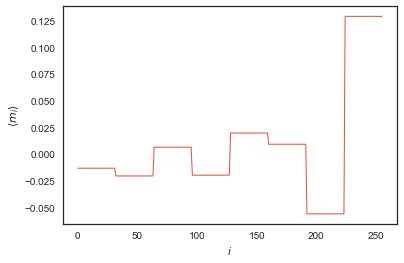

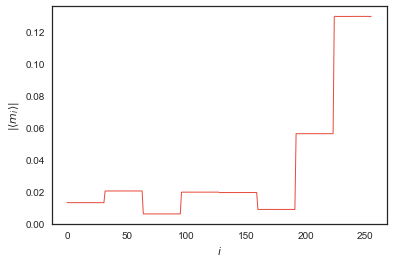

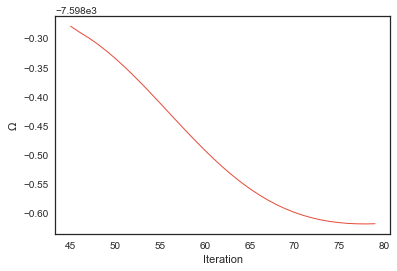

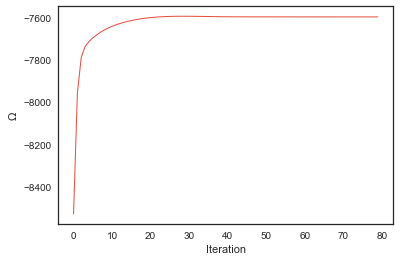

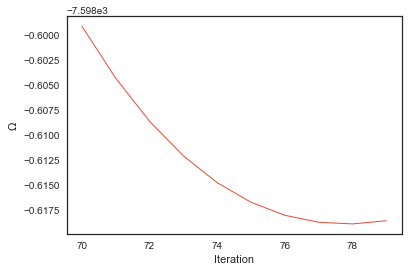

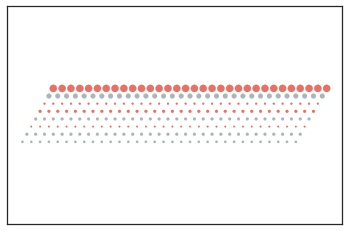

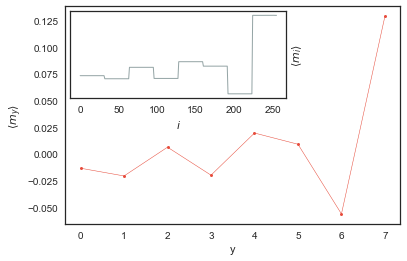

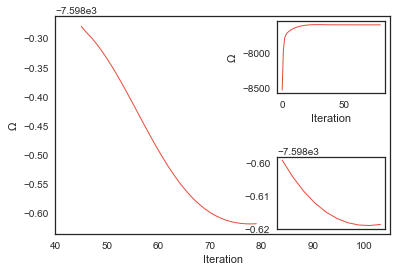

In [180]:
SAVEPLOTS = True
lastNit = 10
dotscale = 400
plotTMD(nUp, nDown, energies, itSwitch, Nx, Ny, lastNit, lastIt, dotscale)
print("Final energy: ", energies[lastIt - 1])

In [41]:
abs_t0 = 0.184

e1 = 1.046 / abs_t0
e2 = 2.104 / abs_t0
t0 = - 1
t1 = 0.401 / abs_t0
t2 = 0.507 / abs_t0
t11 = 0.218 / abs_t0
t12 = 0.338 / abs_t0
t22 = 0.057 / abs_t0

def Hribbon(k, Ny):
    Hrib = np.zeros((3 * Ny, 3 * Ny), dtype=np.complex64)
    
    h1 = np.array([
        
        [e1 + 2 * t0 * np.cos(k),
                    2.j * np.sin(k) * t1,
                    2 * t2 * np.cos(k)],
                   
              [-2.j * np.sin(k) * t1,
               e2 + 2 * t11 * np.cos(k),
               2.j * np.sin(k) * t12],
                   
              [2 * t2 * np.cos(k),
               -2.j * np.sin(k) * t12,
               e2 + 2 * t22 * np.cos(k)]
    
    ], dtype=np.complex64)

    h2 = np.array([
        
        [ 2 * t0 * np.cos(k/2) ,
         1.j * np.sin(k/2) * ( t1 - np.sqrt(3) * t2 ) ,
         -1. * np.cos(k/2) * ( np.sqrt(3) * t1 + t2 )] ,
        
              [ -1.j * np.sin(k/2) * ( t1 + np.sqrt(3) * t2 ),
               0.5 * np.cos(k/2) * ( t11 + 3 * t22 ),
               1.j * np.sin(k/2) * ( np.sqrt(3) / 2 * ( t22 - t11 ) - 2 * t12 ) ],
        
              [ np.cos(k/2) * ( np.sqrt(3) * t1 - t2 ),
               1.j * np.sin(k/2) * ( np.sqrt(3)/2 * ( t22 - t11 ) + 2 * t12 ),
               0.5 * np.cos(k/2) * ( 3 * t11 + t22 ) ]
    
    ], dtype=np.complex64)
    
    for y in range(1, Ny-1):
        Hrib[3*y:3*(y+1), 3*y:3*(y+1)] = h1
        Hrib[3*(y-1):3*y, 3*y:3*(y+1)] = (h2.conj()).T
        Hrib[3*(y+1):3*(y+2), 3*y:3*(y+1)] = h2

    Hrib[0:3, 0:3] = h1
    Hrib[3*(Ny-1):3*(Ny), 3*(Ny-1):3*(Ny)] = h1
    Hrib[3*(Ny-2):3*(Ny-1), 3*(Ny-1):3*Ny] = (h2.conj()).T
    Hrib[3:6, 0:3] = h2
    
    return Hrib

In [42]:
T = Hribbon(1, 4)
T.conj().T - T

array([[ 0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],


## Band structure

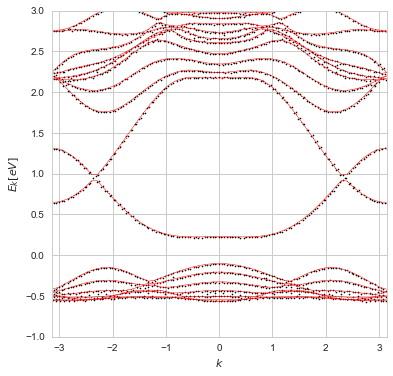

In [45]:
SAVEPLOTS = True

bandLiu=np.loadtxt("bandLiu2013.csv",delimiter=',')
sns.set_style("whitegrid")
W = 8
nks = 60
ks = np.linspace(-np.pi,np.pi, nks)
bandEn = np.zeros((nks,W*3))
for en, k in enumerate(ks):
    Krib = Hribbon(k, W)
    bandEn[en,:] = la.eigvalsh(Krib) * abs_t0

plt.figure(1, figsize=(6, 6))
plt.plot(ks, bandEn, c='r', marker='o', linewidth=0.5, markersize=1)
plt.scatter(bandLiu[:,0],bandLiu[:,1], s=1.5, c = 'black')
plt.xlabel(r'$k$')
plt.ylabel(r'$E_{k} [eV]$')
plt.xlim(-np.pi, np.pi)
plt.ylim(-1, 3)
if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + SAVESUBDIR +"/BandStructureNanoribbonTMD.png", dpi = 600, bbox_inches='tight')

mathEn=np.loadtxt("bandEnsW=8.csv",delimiter=',')
W = 8
nks = 61
ks = np.linspace(-np.pi,np.pi, nks)
bandEnMath = np.zeros((nks,W*3))
bandEn = np.zeros((nks,W*3))
for en, k in enumerate(ks):
    Krib = Hribbon(k, W)
    bandEnMath[en,:] = mathEn[en]
    bandEn[en,:] =  la.eigvalsh(Krib) * 0.184

plt.figure(1, figsize=(5, 4))
plt.plot(ks, bandEnMath, c='b', marker='o', linewidth=0, markersize=2)
plt.plot(ks, bandEn, c='r', linewidth=0.3)
plt.xlabel(r'$k$')
plt.ylabel(r'$E_{k} [eV]$')
plt.xlim(-np.pi-0.05, np.pi+0.05)
plt.ylim(-1, 3)
if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + SAVESUBDIR +"/BandStructureNanoribbonTMD-mathematica.png", dpi = 600, bbox_inches='tight')

In [50]:
Ny = 8

beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 40 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 8 # on-site interaction
muPHS = 12.7 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / (1.1 * itMax) # the factor multiplied by itMax impedes P ( I ) < \delta
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = - Hribbon(0, Ny)

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

#nUp = np.ones(3*Ny) - 0.1 * np.random.rand(3*Ny)

#nDown = np.zeros(3*Ny) + 0.1 * np.random.rand(3*Ny)

# Hybrid initial condition

nUp = np.zeros(3*Ny)
nDown = np.zeros(3*Ny)

spinFlipper = 0.5

for i in range(3*Ny):
    if i % (3) == 0:
        spinFlipper *= -1
    nUp[i] = 0.5 + spinFlipper *.1 * np.random.rand()
    nDown[i] = 0.5 - spinFlipper *.1 * np.random.rand()

# Paramagnetic

#nUp = np.ones(3*Ny) - 0.1 * np.random.rand(3*Ny)

#nDown = np.ones(3*Ny) + 0.1 * np.random.rand(3*Ny)


# Initialize energies
energies = np.zeros(itMax)

# Tolerance

delta = 1e-30

deltaUp = delta + 1
deltaDown = delta + 1

while (it < itMax and \
      deltaUp > delta and\
      deltaDown > delta): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(3*Ny) * ( nDown + C / 2 / Ny / 3 )
    Hdown = - t * K + U * np.eye(3*Ny) * ( nUp + C / 2 / Ny / 3 )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(3*Ny):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(3*Ny):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    deltaUp = np.dot(nUp - nUpOld, nUp - nUpOld) / (3*Ny)**2  
    deltaDown = np.dot(nDown - nDownOld, nDown - nDownOld) / (3*Ny)**2
    
    # To check convergence
    print('delta nUp: ', deltaUp)
    print('delta nDown: ', deltaDown)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / Ny/3 )
    
    energies[it] = U * np.dot(nUp, nDown) / Ny/3 + mu * (nUp + nDown).sum() / Ny/3\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1
    
lastIt = it

beta:  1.0
delta nUp:  0.000447671852901
delta nDown:  0.000427572589225
<n>:  0.969794487471
beta:  1.1
delta nUp:  5.77782369947e-05
delta nDown:  5.28302452548e-05
<n>:  0.981785745188
beta:  1.2100000000000002
delta nUp:  1.34320549125e-05
delta nDown:  1.18583527582e-05
<n>:  0.98551450211
beta:  1.3310000000000004
delta nUp:  1.32647269641e-05
delta nDown:  1.27645114235e-05
<n>:  0.987055258348
beta:  1.4641000000000004
delta nUp:  3.10594907036e-05
delta nDown:  2.92758302094e-05
<n>:  0.988080794943
beta:  1.6105100000000006
delta nUp:  6.83489836153e-05
delta nDown:  6.61357019123e-05
<n>:  0.991592864819
beta:  1.7715610000000008
delta nUp:  0.000100026278753
delta nDown:  0.000103914391582
<n>:  0.999256850394
beta:  1.9487171000000012
delta nUp:  7.80349272716e-05
delta nDown:  8.6126436769e-05
<n>:  1.00846485015
beta:  2.1435888100000016
delta nUp:  3.99560264811e-05
delta nDown:  4.08424610442e-05
<n>:  1.01594780415
beta:  2.357947691000002
delta nUp:  2.19474750008e-0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:120: ComplexWarning: Casting complex values to real discards the imaginary part


delta nUp:  1.2572419984e-12
delta nDown:  3.6628655611e-13
<n>:  1.04166566151
beta:  15.863092971714952
delta nUp:  2.54961149234e-13
delta nDown:  1.06293876425e-13
<n>:  1.04166626222
beta:  17.44940226888645
delta nUp:  4.98343733492e-14
delta nDown:  2.96021036529e-14
<n>:  1.04166651067
beta:  19.194342495775096
delta nUp:  1.02124154021e-14
delta nDown:  8.06777188159e-15
<n>:  1.04166660862
beta:  21.113776745352606
delta nUp:  2.43692138322e-15
delta nDown:  2.20342516151e-15
<n>:  1.04166664569
beta:  23.22515441988787
delta nUp:  7.04785908722e-16
delta nDown:  6.16887335082e-16
<n>:  1.04166665926
beta:  25.54766986187666
delta nUp:  2.32917537871e-16
delta nDown:  1.79684751662e-16
<n>:  1.0416666641
beta:  28.10243684806433
delta nUp:  8.13738959783e-17
delta nDown:  5.4615513339e-17
<n>:  1.04166666579
beta:  30.912680532870763
delta nUp:  2.87370953998e-17
delta nDown:  1.72046753058e-17
<n>:  1.04166666637
beta:  34.00394858615784
delta nUp:  1.00780532047e-17
delta n

In [51]:
nUpSite = np.zeros(Ny)
nDownSite = np.zeros(Ny)
for i in range(Ny):    
    nUpSite[i] = nUp[nOrb * i] + nUp[nOrb * i + 1] + nUp[nOrb * i + 2]
    nDownSite[i] = nDown[nOrb * i] + nDown[nOrb * i + 1] + nDown[nOrb * i + 2]

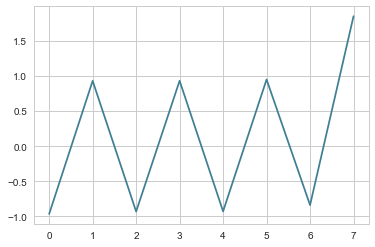

In [52]:
plt.plot((nUpSite-nDownSite))

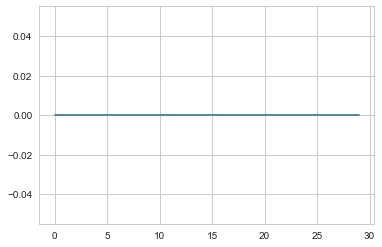

In [57]:
plt.plot(energies[70:])

In [465]:
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 20 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 4 # on-site interaction
muPHS = 12.7 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / (1.2 * itMax) # the factor multiplied by itMax impedes P ( I ) < \delta
itSwitch = 0
dampFreq = 10
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = - Hribbon(0, W)

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

nUp = np.ones(3*Ny) - 0.1 * np.random.rand(3*Ny)

nDown = np.zeros(3*Ny) + 0.1 * np.random.rand(3*Ny)

# Hybrid initial condition

nUp = np.zeros(3*Ny)
nDown = np.zeros(3*Ny)

spinFlipper = 0.5

for i in range(3*Ny):
    if i % (3) == 0:
        spinFlipper *= -1
    nUp[i] = 0.5 + spinFlipper
    nDown[i] = 0.5 - spinFlipper

# Initialize energies
energies = np.zeros(itMax)

# Tolerance

delta = 1e-30

deltaUp = delta + 1
deltaDown = delta + 1

while (it < itMax and \
      deltaUp > delta and\
      deltaDown > delta): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(3*Ny) * ( nDown + C / 2 / Ny / 3 )
    Hdown = - t * K + U * np.eye(3*Ny) * ( nUp + C / 2 / Ny / 3 )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(3*Ny):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(3*Ny):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    deltaUp = np.dot(nUp - nUpOld, nUp - nUpOld) / (3*Ny)**2  
    deltaDown = np.dot(nDown - nDownOld, nDown - nDownOld) / (3*Ny)**2
    
    # To check convergence
    print('delta nUp: ', deltaUp)
    print('delta nDown: ', deltaDown)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / Ny/3 )
    
    energies[it] = U * np.dot(nUp, nDown) / Ny/3 + mu * (nUp + nDown).sum() / Ny/3\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1
    
lastIt = it

beta:  1.0
delta nUp:  0.00181895220594
delta nDown:  0.0018204413189
<n>:  1.00204556963
beta:  1.1
delta nUp:  0.00223752216498
delta nDown:  0.00219062810194
<n>:  0.981397477362
beta:  1.2100000000000002
delta nUp:  9.22246197758e-05
delta nDown:  6.82482500061e-05
<n>:  0.966144087785
beta:  1.3310000000000004
delta nUp:  1.44024692685e-05
delta nDown:  1.25164379709e-05
<n>:  0.955736632706
beta:  1.4641000000000004
delta nUp:  2.99993814077e-06
delta nDown:  2.08153609227e-06
<n>:  0.952033310166
beta:  1.6105100000000006
delta nUp:  8.10688385195e-07
delta nDown:  5.27853716536e-07
<n>:  0.948511269854
beta:  1.7715610000000008
delta nUp:  1.43525729168e-06
delta nDown:  1.33657040739e-06
<n>:  0.948108442242
beta:  1.9487171000000012
delta nUp:  2.6294390561e-06
delta nDown:  2.59882904422e-06
<n>:  0.948918670908
beta:  2.1435888100000016
delta nUp:  4.2728780728e-06
delta nDown:  4.2639671005e-06
<n>:  0.951700824801
beta:  2.357947691000002
delta nUp:  5.18346723266e-06
del

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:111: ComplexWarning: Casting complex values to real discards the imaginary part


delta nUp:  1.28787068647e-10
delta nDown:  1.28787068648e-10
<n>:  0.99998173709
beta:  17.44940226888645
delta nUp:  1.42024540758e-11
delta nDown:  1.4202454076e-11
<n>:  0.999988276416
beta:  19.194342495775096
delta nUp:  2.08451993174e-11
delta nDown:  2.0845199316e-11
<n>:  0.999996928999
32
beta:  20
delta nUp:  3.10028205304e-12
delta nDown:  3.10028205326e-12
<n>:  0.999998004509
beta:  20
delta nUp:  4.12929172969e-13
delta nDown:  4.1292917297e-13
<n>:  0.999998006469
beta:  20
delta nUp:  5.57171281017e-14
delta nDown:  5.57171281492e-14
<n>:  0.999998007262
beta:  20
delta nUp:  7.52073339636e-15
delta nDown:  7.5207333706e-15
<n>:  0.999998007555
beta:  20
delta nUp:  1.01487353079e-15
delta nDown:  1.01487354117e-15
<n>:  0.999998007662
beta:  20
delta nUp:  1.36983053196e-16
delta nDown:  1.369830494e-16
<n>:  0.999998007701
beta:  20
delta nUp:  1.84859363383e-17
delta nDown:  1.84859370858e-17
<n>:  0.999998007716
beta:  20
delta nUp:  2.4951008641e-18
delta nDown:  

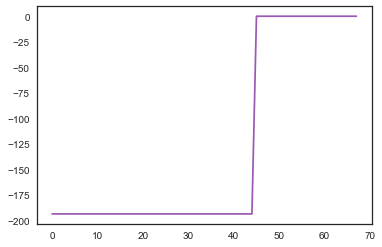

In [466]:
plt.plot(energies[itSwitch:])

In [279]:
nUp

array([ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.])

In [280]:
nDown

array([ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.])

In [281]:
nUp - nDown

array([-1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.])